# Nonlinear Equations

We want to find a root of the nonlinear function $f$ using different methods.

1. Bisection method
2. Newton method
3. Chord method
4. Secant method
5. Fixed point iterations





In [35]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import sympy as sym

si è scelto un polinomio di legendre perché non lineare (altrimenti la soluzione sarebbe banale);
sympy permette la matematica simbolica (ovvero che usa 'incognite' e simboli come sin(), exp(), ecc...) in python

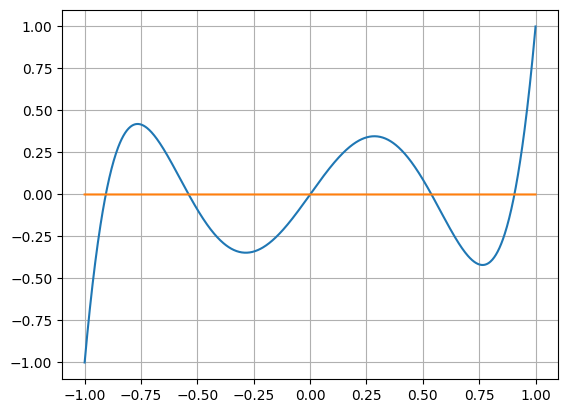

In [49]:
t = sym.symbols('t')

f_sym = t/8. * (63.*t**4 - 70.*t**2. +15.)   # Legendre polynomial of order 5

f_prime_sym = sym.diff(f_sym, t)

f = sym.lambdify(t, f_sym, 'numpy')
f_prime = sym.lambdify(t, f_prime_sym, 'numpy')

phi_sym = 63./70.*t**3 + 15./(70.*t)
#phi_sym = 70.0/15.0*t**3 - 63.0/15.0*t**5
#phi_sym = sym.sqrt((63.*t**4 + 15.0)/70.)

phi_prime_sym = sym.diff(phi_sym, t)

phi = sym.lambdify(t, phi_sym, 'numpy')
phi_prime = sym.lambdify(t, phi_prime_sym, 'numpy')

# Let's plot
n = 1025

x = linspace(-1, 1, n)
c = zeros_like(x)

_ = plot(x, f(x))
_ = plot(x, c)
_ = grid()

In [37]:
# Initial data for the variuos algorithms

# interval in which we seek the solution 
a = 0.7
b = 1.

# initial points
x0 = (a+b)/2.0
x00 = b

we have two choose stopping criteria bot on error and on number of iterations

In [38]:
# stopping criteria
eps = 1e-10
n_max = 1000

## Bisection method

$$
x^k = \frac{a^k+b^k}{2}
$$
```
                   if (f(a_k) * f(x_k)) < 0:
                      b_k1 = x_k
                      a_k1 = a_k
                   else:
                      a_k1 = x_k
                      b_k1 = b_k
```

31
0.906179845915176
6.984912648277941e-11


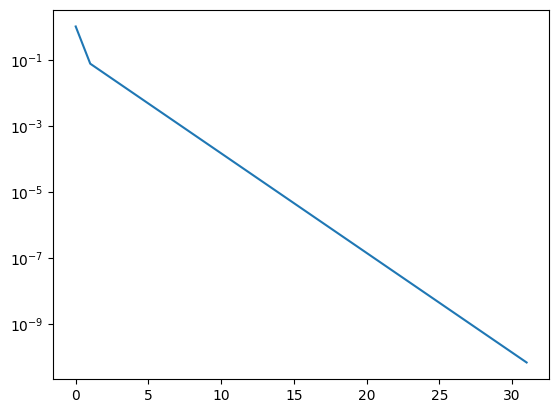

In [39]:
def bisect(f, a, b, eps, n_max):

    assert f(a)*f(b)<0
    a_new = a
    b_new = b
    x = mean([a,b])
    err = eps + 1.
    errors = [err]
    it = 0
    
    while (err > eps and it < n_max):
        if ( f(a_new) * f(x) < 0 ):
            # root in (a_new,x)
            b_new = x
        else:
            # root in (x,b_new)
            a_new = x
        
        x_new = mean([a_new,b_new])
        
        #err = 0.5 *(b_new -a_new)
        #err = abs(f(x_new))
        err = abs(x-x_new)
        
        errors.append(err)
        x = x_new
        it += 1
    
    semilogy(errors)
    print(it)
    print(x)
    print(err)
    return errors
              
#%time 
errors_bisect = bisect(f,a,b,eps,n_max)

scrivendo la formula per la larghezza dell'intervallo all k-esima iterazione posso anche calcolare il numero teorico di iterazioni necessarie a raggiungere un errore minore di eps; si osserva che è coerente con il numero di iterazioni raggiunto numericamente

In [40]:
it_theor = log2(abs(b-a)/eps)
print(it_theor)

31.482315354707417


In order to find out other methods for solving non-linear equations, let's compute the Taylor's series of $f(x^k)$ up to the first order 

$$
f(x^k) \simeq f(x^k) + (x-x^k)f^{\prime}(x^k)
$$
which suggests the following iterative scheme
$$
x^{k+1} = x^k - \frac{f(x^k)}{f^{\prime}(x^k)}
$$

The following methods are obtained applying the above scheme where

$$
f^{\prime}(x^k) \approx q^k
$$

## Newton's method
$$
q^k = f^{\prime}(x^k)
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

5
0.9061798459386647
5.633945684709343e-15


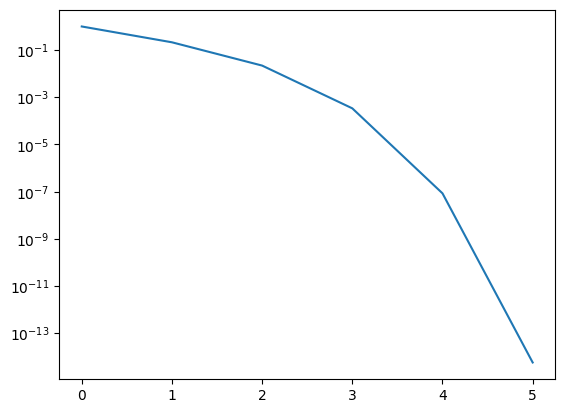

In [41]:
def newton(f, f_prime, x0, eps, n_max):

    err = eps+1
    it = 0
    x = x0
    errors = [err]

    while err > eps and it < n_max:
        q = f_prime(x)
        assert q > 1e-12, 'derivata troppo vicina a zero'
        x = x - f(x)/q
        it = it+1
        err = abs(f(x))
        errors.append(err)

    semilogy(errors)
    print(it)
    print(x)
    print(err)
    return errors

#%time
errors_newton = newton(f, f_prime, 1.0, eps, n_max)

30
0.9061798459159386
6.730749291250504e-11


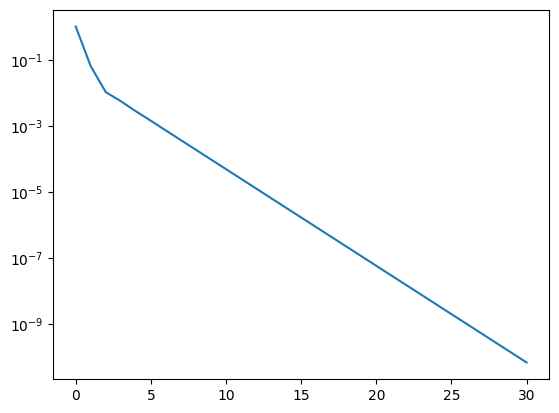

In [42]:
# c'è qualcosa di sbagliato

def chord(f, a, b, x0, eps, n_max):
    
    err = eps+1
    it = 0
    x = x0
    errors = [err]
    q = (f(b) - f(a)) / (b - a)
    assert q > 1e-12, 'derivata troppo vicina a zero'

    while err > eps and it < n_max:
        x_old = x
        x = x - f(x)/q
        it = it+1
        err = abs(x - x_old)
        errors.append(err)

    semilogy(errors)
    print(it)
    print(x)
    print(err)
    return errors    

errors_chord = chord(f, a, b, x0, eps, n_max)

## Chord method

$$
q^k \equiv q = \frac{f(b)-f(a)}{b-a}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q}
$$

## Secant method

$$
q^k = \frac{f(x^k)-f(x^{k-1})}{x^k - x^{k-1}}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

Note that this algorithm requirs **two** initial points

7
0.906179845938664
6.433087396118253e-11


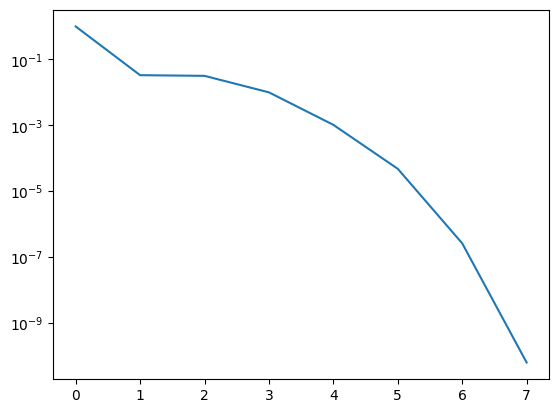

In [43]:
def secant(f, x0, x00, eps, n_max):

    err = eps+1
    it = 0
    x_old = x00
    x = x0
    errors = [err]

    while err > eps and it < n_max:
        q = (f(x) - f(x_old)) / (x - x_old)
        assert q > 1e-12, 'derivata troppo vicina a zero'
        x_old = x
        x = x - f(x)/q
        it = it+1
        err = abs(x-x_old)
        errors.append(err)

    semilogy(errors)
    print(it)
    print(x)
    print(err)
    return errors

errors_secant = secant(f,x0,x00,eps,n_max)

## Fixed point iterations

$$
f(x)=0 \to x-\phi(x)=0
$$

$$
x^{k+1} = \phi(x^k)
$$

37
0.53846931018415
7.187905826100405e-11
1.2070794583320574


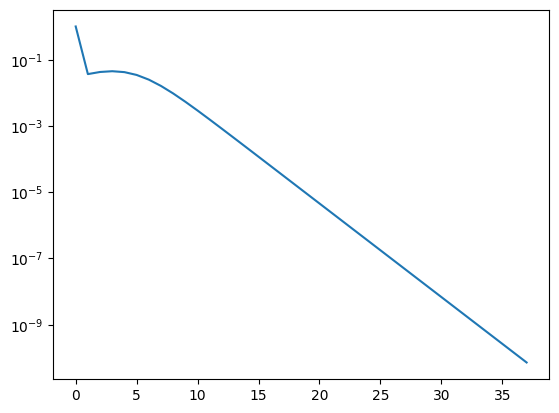

In [50]:
# per questo metodo è fondamentale che la funzione phi abbia derivata minore di 1 in valore assoluto
# (NON è l'unica condizione da essere soddisfatta per la convergenza, ma di solito è la più critica)

def fixed_point(phi, x0, eps, n_max):

    err = eps+1
    it = 0
    x = x0
    errors = [err]

    while err > eps and it < n_max:
        x_old = x
        x = phi(x)
        it = it+1
        err = abs(x-x_old)
        errors.append(err)
    
    semilogy(errors)
    print(it)
    print(x)
    print(err)
    return errors

initial_guess = 0.8
errors_fixed = fixed_point(phi, initial_guess, eps, n_max)
print(phi_prime(initial_guess))   # to check if the condition on the derivative is satisfied

# notare che con la prima phi si converge comunque ad uno zero della funzione, ma non a quello
# desiderato (ovvero quello più vicino alla initial guess), perché la condizione sulla derivata di
# phi non è soddisfatta;
# con la terza phi succede la stessa, ma perché non è soddisfatta la condizione sulla limitatezza
# del codominio

## Comparison

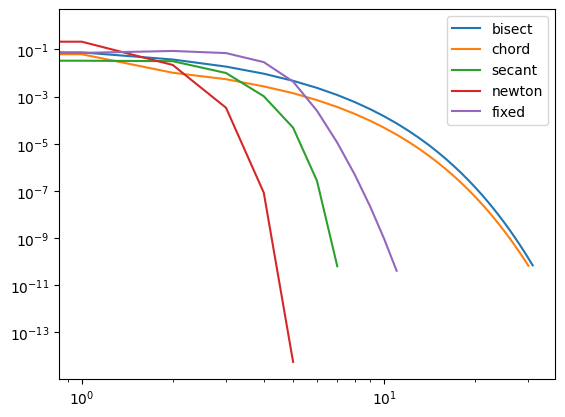

In [45]:
# plot the error convergence for the methods
loglog(errors_bisect, label='bisect')
loglog(errors_chord, label='chord')
loglog(errors_secant, label='secant')
loglog(errors_newton, label ='newton')
loglog(errors_fixed, label ='fixed')
_ = legend()

In [46]:
# Let's compare the scipy implmentation of Newton's method with our..

In [47]:
import scipy.optimize as opt
%time opt.newton(f, 1.0, f_prime, tol = eps)

CPU times: user 460 µs, sys: 62 µs, total: 522 µs
Wall time: 531 µs


0.906179845938664